 #USGS Astrogeology Python Usage
--------
####Jay Laura, Trent Hare, Lisa Gaddis, & Robin Fergason

6.9.15

Presentation @ http://github.com/jlaura/presentations/2015_data_users_workshop

<img src="2015_datausers_images/python_logo.png" alt="Drawing" style="width: 200px;" align="center"/> 

* A brief overview of Python.  
* How are we leveraging Python at USGS?
    * High Performance Computing
    * Legacy Code
    * IPython Notebook
    * Modelling
    * PySAT / PyStretch
* How do we envision expanding our usage?
* Come to the tutorial...

Originally published @ https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb

General characteristics of Python:

* **clean and simple language:** Easy-to-read and intuitive code, easy-to-learn minimalistic syntax, maintainability scales well with size of projects.
* **expressive language:** Fewer lines of code, fewer bugs, easier to maintain.

Technical details:

* **dynamically typed:** No need to define the type of variables, function arguments or return types.
* **automatic memory management:** No need to explicitly allocate and deallocate memory for variables and data arrays. No memory leak bugs. 
* **interpreted:** No need to compile the code. The Python interpreter reads and executes the python code directly.

Advantages:

* The main advantage is ease of programming, minimizing the time required to develop, debug and maintain the code.
* Well designed language that encourage many good programming practices:
 * Modular and object-oriented programming, good system for packaging and re-use of code. This often results in more transparent, maintainable and bug-free code.
 * Documentation tightly integrated with the code.
* A large standard library, and a large collection of add-on packages.

Disadvantages:

* Since Python is an interpreted and dynamically typed programming language, the execution of python code can be slow compared to compiled statically typed programming languages, such as C and Fortran. 
* Somewhat decentralized, with different environment, packages and documentation spread out at different places. Can make it harder to get started.

What does all this boil down to?

<img src="2015_datausers_images/optimizing-what.png" width="800" align='center'>

###How are we using Python at Astro?

* High Performance Computing
* Legacy Code
* IPython Notebook
* Modelling
* PySAT / PyStretch

###High Performance Computing

<img src='2015_datausers_images/gci.png' width=600 padding=10 align='right' />

* Ideally suited for middleware software development
* Couples well with the big 2: Fortran & C
* Available on most (all?) clusters

<p align='right'><font size="1">Image from: Wang, S., Anselin, L., Bhaduri, B., Crosby, C., Goodchild, M., Liu, Y., and Nyerges, T. (2013). Cybergis software: a synthetic review and integration roadmap. International Journal of Geographical Information Science, 27(11):2122–2145.</font></p>


### 3D Topographic Flyovers
* Available @ https://github.com/USGS-Astrogeology/SpaceBlender
* Automated 3D topographic flyovers from a DTM.  
* Originally started as a student project at NAU.

In [94]:
from IPython.display import HTML
HTML("""<video controls>
<source src='2015_datausers_images/flyover.mp4' type="video/mp4">
</video>""")

### KRC Thermal Inertia Model
* Parallel generation of KRC lookup tables resulting in ~200GB output
* Parsing and compression into HDF5 ~16GB output
* 10 Dimensional Interpolation using a 18 x 27 x 40500 NumPy Array
    * Pure Python
    * Fully distributed using MPI
    * Job submission managed via Python (PBS Script Writer)

###Legacy Code
* Leverage existing Fortran or C
* Write new Fortran or C for performance critical bottlenecks
* What does this look like?

In [186]:
%%file hellofortran.f
C File  hellofortran.f
        subroutine hellofortran (n)
        integer n
       
        do 100 i=1, n
            print *, "Fortran says hello"
100     continue
        end

Overwriting hellofortran.f


In [187]:
!f2py -c -m hellofortran hellofortran.f

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "hellofortran" sources
f2py options: []
f2py:> /var/folders/3x/2qpj_j8j739gt379kfgkwhl40000gq/T/tmpjY8U82/src.macosx-10.5-x86_64-2.7/hellofortranmodule.c
creating /var/folders/3x/2qpj_j8j739gt379kfgkwhl40000gq/T/tmpjY8U82/src.macosx-10.5-x86_64-2.7
Reading fortran codes...
	Reading file 'hellofortran.f' (format:fix,strict)
Post-processing...
	Block: hellofortran
			Block: hellofortran
Post-processing (stage 2)...
Building modules...
	Building module "hellofortran"...
		Constructing wrapper function "hellofortran"...
		  hellofortran(n)
	Wrote C/API module "hellofortran" to file "/var/folders/3x/2qpj_j8j739gt379kfgkwhl40000gq/T/tmpjY8U82/src.macosx-10.5-x86_64-2.7/hellofortranmodule.c"
  adding '/var/folders/3x/2qpj_j8j739gt3

In [188]:
%%file hello.py
import hellofortran
hellofortran.hellofortran(3)

Overwriting hello.py


In [189]:
# run the script
!python hello.py

 Fortran says hello
 Fortran says hello
 Fortran says hello


<img src='2015_datausers_images/IPy_header.png'/>

* Interactive computation, visualization, and data analysis
* Easily version controlled and shared (reproducability and collaboration)
* Connects to HPC resources transparently
* This presentation is a notebook...


In [192]:
#Recursive fibonnaci
def fibRec(n):
    if n < 2:
        return n
    else:
        return fibRec(n-1) + fibRec(n-2)

for i in range(10):
    print fibRec(i)

0
1
1
2
3
5
8
13
21
34


Populating the interactive namespace from numpy and matplotlib


<matplotlib.colorbar.Colorbar instance at 0x10be785f0>

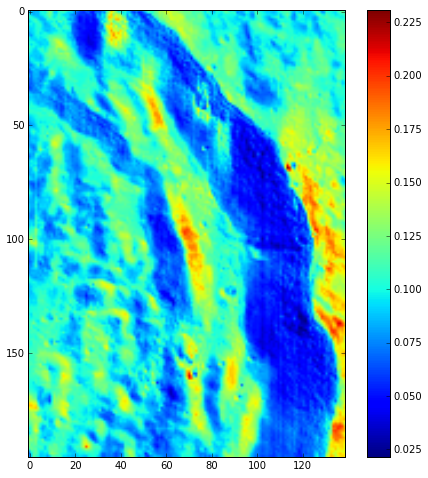

In [194]:
#Data visualization
%pylab inline
from osgeo import gdal
figsize(8,8)
ds = gdal.Open('/Users/jay/github/python_tutorials/data/M3_4030seg_L2_aristcrater.tif')
bnd = ds.GetRasterBand(16) #1 based
arr = bnd.ReadAsArray()
imshow(arr)
colorbar()

In [197]:
###Integration with other libraries
import IPython.lib.display as display
display.IFrame('force/force.html',
              width=1000,
              height=800)

###Modeling: Strombolian Volcano Simulaton
<img src='2015_datausers_images/volcano.png' width='650'style="float:right"/>
<small>
* Strombolian eruption 
* Iterative deposition
* Topographic intersection checking
* Interactive data visualization
* Pure Python
* Leverages NumPy, GDAL, SciPy 
</small>

###Modeling: Change Detection and Validation
* Pure Python data readers and HTML generation
* Jinja2 templating and D3 (javascript) data visualization
<img src='2015_datausers_images/krc_val.png'/>

###PySAT / PyStretch
<img src='2015_datausers_images/pysat.png'/>

<img src="2015_datausers_images/multisingle.png" width=900 />





#PySAT (cont)
* Documentation @ http://jlaura.github.io/pysat
* Cross platform application bundles all dependencies
* GDAL and custom binary reading to support IO
* Matplotlib spectral and derived product generation
* SciPy driven statistical analysis
* Release coming soon?

###RESTful service deployment
Available @ https://github.com/pysal/pysalREST/

* Goal: Support automated REST service deployment using code introspection
* Proof-of-concept
* Deploy a high-end spatial analysis library to a cluster (30 machine, load balanced web servers backed by a 100+ node cluster)
* No manual wrapper script generation
* JSON based API
* Designed to support big data / big process requirements

<img src='2015_datausers_images/astrogit.png'/>

##Future Usage
* Continued HPC integration
* OpenGL Driven Visualizations (VisPy)
* Additional porting of legacy code
* Expanded usage for rapid prototyping
* Proposing integration into the ISIS environment


#Tutorial Tomorrow @ 4

#Questions?